# PTID-CDS-FEB-24-1786 

## PRCP-1003-CustTransPred

# OBJECTIVE

The data given to us anonymized. The goal of the project is to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

# Domain Analysis

#### 1. Introduction
The dataset provided is of a bank. The bank tracks and idenfy each and every transactions of their Customers. Now in this project our goal is to make a model to forecast which customer will make any transactions in the future.

#### 2. Contextual factors
The dataset provided to us has undergone anonymization, a process wherein the features or identifying information within the data are obscured or generalized. This practice is implemented to safeguard the real identities and uphold data privacy standards. Each bank diligently tracks transactions not only for banking purposes but also to offer additional services and to mitigate the risks of fraud. Anonymization serves as a crucial measure in ensuring that sensitive information remains protected while still enabling the utilization of valuable data for analysis and insights. 

#### 3. Data and Information

The dataset comprises 200 features alongside columns for ID_code and target. Within the target column, values of 0 denote customers who will not engage in a transaction, while values of 1 signify those who will. Majorly it is Numerical dataset.

### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the Data

In [2]:
data=pd.read_csv(r"C:\Users\Abhinkita\OneDrive\Desktop\Project Data\train(1).csv")

In [3]:
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


### 3. Finding the Null values 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


### 4. General info about the Data

In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
pd.set_option('display.max_rows', None) 

In [7]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0

###  5. Exploratory Data Analysis

###### As instructed, we have not performed EDA as the feature names were not provided. 

### 6. Data Preprocessing and Feature Engineering

In [8]:
data[data.isnull().any(axis=1)] 

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [9]:
data.select_dtypes(include=['int64','float64']).columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [10]:
data.select_dtypes(include=['object']).columns

Index(['ID_code'], dtype='object')

In [ ]:
# Dropping 'ID_code' Column, as it is a catagorical data.

In [11]:
data.drop(columns=['ID_code'],inplace=True)

In [12]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [13]:
data.select_dtypes(include=['object']).columns

Index([], dtype='object')

### 7. Feature Selection 

### Splitting the data  into Train and Test Split 

In [14]:
X=data.drop('target',axis=1)
y=data.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import MinMaxScaler 
scale=MinMaxScaler()

In [17]:
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [18]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(160000, 200)
(160000,)
(40000, 200)
(40000,)


#### Balancing

In [19]:
from imblearn.over_sampling import SMOTE

sm= SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

### 8.Model Creation 

##### LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)


LogisticRegression()

In [21]:
y_pred_LR=LR.predict(X_test)
y_pred_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [23]:
AS1=accuracy_score(y_test, y_pred_LR)
RS1=recall_score(y_test, y_pred_LR, average='weighted')
F1_1=f1_score(y_test, y_pred_LR, average='weighted')
PS1=precision_score(y_test, y_pred_LR, average='weighted')
print('Accuracy score : ',AS1)
print('Recall score :  ',RS1)
print('F1 score : ',F1_1)
print('Precision score : ',PS1)

Accuracy score :  0.91315
Recall score :   0.91315
F1 score :  0.8923777550270876
Precision score :  0.9005267115208846


In [24]:
cm1=confusion_matrix(y_test,y_pred_LR)
cm1

array([[35560,   343],
       [ 3131,   966]], dtype=int64)

In [25]:
print (classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.74      0.24      0.36      4097

    accuracy                           0.91     40000
   macro avg       0.83      0.61      0.66     40000
weighted avg       0.90      0.91      0.89     40000



#### DecisionTree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()                     
dt.fit(X_sm,y_sm)

DecisionTreeClassifier()

In [27]:
y_pred4=dt.predict(X_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

##### Model evaluation

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [29]:
AS4=accuracy_score(y_test, y_pred4)
RS4=recall_score(y_test, y_pred4, average='weighted')
F1_4=f1_score(y_test, y_pred4, average='weighted')
PS4=precision_score(y_test, y_pred4, average='weighted')

In [30]:
print('Accuracy score : ',AS4)
print('Recall score :  ',RS4)
print('F1 score : ',F1_4)
print('Precision score : ',PS4)

Accuracy score :  0.7159
Recall score :   0.7159
F1 score :  0.7617864863602234
Precision score :  0.8260325529880416


In [31]:
cm4=confusion_matrix(y_test, y_pred4)
cm4

array([[27390,  8513],
       [ 2851,  1246]], dtype=int64)

In [32]:
print (classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     35903
           1       0.13      0.30      0.18      4097

    accuracy                           0.72     40000
   macro avg       0.52      0.53      0.50     40000
weighted avg       0.83      0.72      0.76     40000



### Model Classification Report

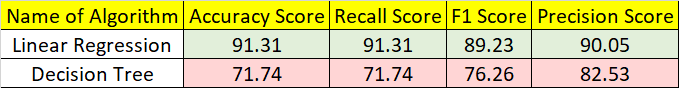

#### From the table, we can observe that we are getting the best accuracy of 91.31 from Linear Regression algorithm.

## Report on Challenges Faced
1. The size of the given dataset was bigger than what we have executed till now.
2. The features were not provided, so EDA was not performed.
3. Evaluation of certain models were taking almost 2-3 days. So, basically we could not explore more models due to that.